#### PROJECT GOAL IS TO CREATE RECOMMENDER SYSTEM FOR PROVIDED E-COMMERCE PRODUCT DATABASE

#### IMPORT NECESSARY LIBRARIES

In [345]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors

from scipy.sparse import csr_matrix

#### LOADING AND PRINTING PROVIDED DATABASE

In [340]:
amazon = pd.read_csv("C:/Users/Uzytkownik/Desktop/Kaggle competitions/Product Recommendation System for e-commerce/ratings_Beauty.csv")

amazon

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0000000000,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0000000000,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0000000000,1404691200
3,A1WMRR494NWEWV,0733001998,4.0000000000,1382572800
4,A3IAAVS479H7M7,0737104473,1.0000000000,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0000000000,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0000000000,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0000000000,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0000000000,1405555200


#### CHECKING FOR NULL VALUES IN PROVIDED DATA

In [341]:
amazon.isna().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

#### CREATING DATAFRAME WITH TOTAL RAITING COUNT FEATURE

In [342]:
amazon_popular_products = pd.DataFrame(amazon.groupby('ProductId')['Rating']
                                       .count()
                                       .reset_index()
                                       .rename(columns = {'Rating': 'TotalRatingCount'}))

amazon_popular_products

,ProductId,TotalRatingCount
0,0205616461,1
1,0558925278,2
2,0733001998,1
3,0737104473,1
4,0762451459,1
...,...,...
249269,B00LORWRJA,1
249270,B00LOS7MEE,1
249271,B00LP2YB8E,1
249272,B00LPVG6V0,1


#### SORTING CREATED DATAFRAME BY TOTAL RATING COUNT DESCENDING

In [343]:
amazon_popular_products_sorted = amazon_popular_products.sort_values('TotalRatingCount', ascending= False)

amazon_popular_products_sorted

,ProductId,TotalRatingCount
65766,B001MA0QY2,7533
10516,B0009V1YR8,2869
110873,B0043OYFKU,2477
2365,B0000YUXI0,2143
105018,B003V265QW,2088
...,...,...
128402,B004U81OBC,1
128397,B004U7R0EI,1
128393,B004U7Q2O2,1
128390,B004U7NKRE,1


#### DEFINING MOST POPULAR PRODUCT TRESHOLD TO USE AS A RECOMMENDATION FOR NEWLY JOINED CUSTOMERS

In [197]:
most_popular = 30

#### PLOTTING BARPLOT WITH MOST POPULAR PRODUCTS - END OF RECOMMENDATION SYSTEM 1

Text(0, 0.5, 'RatingCount')

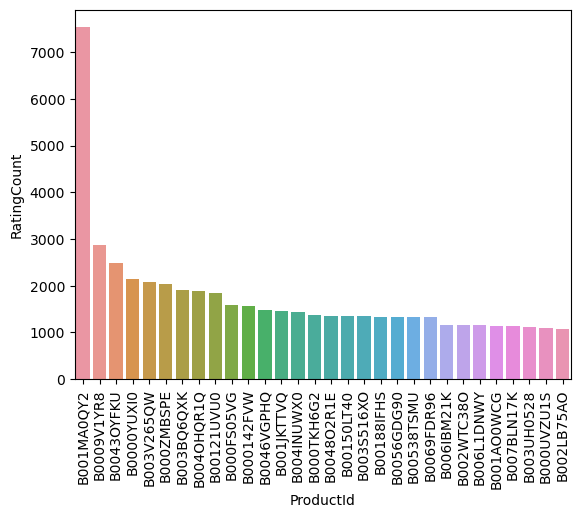

In [346]:
ax = sns.barplot(x= amazon_popular_products_sorted['ProductId'][:most_popular], y= amazon_popular_products_sorted['TotalRatingCount'][:most_popular])
ax.tick_params(axis='x', labelrotation=90)
plt.xlabel("ProductId")
plt.ylabel("RatingCount")

#### LEFT-JOINING DATAFRAME WITH TOTAL RATING COUNT TO BASE PROVIDED E-COMMERCE PRODUCT DATA

In [199]:
Rating_With_TotalRatingCount = amazon.merge(amazon_popular_products, left_on = 'ProductId', right_on = 'ProductId', how = 'left')
Rating_With_TotalRatingCount

,UserId,ProductId,Rating,Timestamp,TotalRatingCount
0,A39HTATAQ9V7YF,0205616461,5.0000000000,1369699200,1
1,A3JM6GV9MNOF9X,0558925278,3.0000000000,1355443200,2
2,A1Z513UWSAAO0F,0558925278,5.0000000000,1404691200,2
3,A1WMRR494NWEWV,0733001998,4.0000000000,1382572800,1
4,A3IAAVS479H7M7,0737104473,1.0000000000,1274227200,1
...,...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0000000000,1405296000,1
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0000000000,1405296000,1
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0000000000,1405382400,1
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0000000000,1405555200,1


#### DEFINING FILM POPULARITY TRESHOLD TO ELIMINATE PRODUCTS WHICH HAS BEEN RATED NOT SO MANY TIMES

In [327]:
Popularity_Threshold = 50

Rating_Popular_Movie = Rating_With_TotalRatingCount.query('TotalRatingCount >= @Popularity_Threshold').reset_index()

Rating_Popular_Movie

,index,UserId,ProductId,Rating,Timestamp,TotalRatingCount
0,1705,A2SR9M2CWC2OCP,9790790961,4.0000000000,1379894400,70
1,1706,A3V1EVBYP0U77W,9790790961,2.0000000000,1397606400,70
2,1707,AVJKKAS4P52P9,9790790961,5.0000000000,1404432000,70
3,1708,A2NQQDBBGFW1OT,9790790961,5.0000000000,1390694400,70
4,1709,A1OFNEUHZ7BSCB,9790790961,5.0000000000,1392336000,70
...,...,...,...,...,...,...
906754,2022803,A2EIA53X91F8J,B00L5JHZJO,5.0000000000,1399939200,488
906755,2022804,A1MDF6GJDANUTH,B00L5JHZJO,5.0000000000,1404604800,488
906756,2022805,A3T20TGEE4OPB5,B00L5JHZJO,5.0000000000,1400716800,488
906757,2022806,A2MCFN2F0IINLY,B00L5JHZJO,5.0000000000,1399939200,488


In [328]:
Rating_Popular_Movie = Rating_Popular_Movie.head(10000)

#### CREATING PIVOT TABLE FOR PRODUCTS

In [347]:
Rating_Popular_Movie_Pivot = Rating_Popular_Movie.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)

Rating_Popular_Movie_Pivot

ProductId,9790790961,9790799829,B00004TMFE,B00004TUBL,B00004TUBV,B00004U9UY,B00004U9V2,B000050B6U,B000050B75,B000050FET,...,B0000535RA,B0000535RD,B0000535U2,B0000535UA,B0000535UM,B0000535UT,B0000536A3,B0000536EK,B0000536EY,B0000536M2
UserId,,,,,,,,,,,,,,,,,,,,,
A03056581JJIOL5FSKJY7,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A059547920Q3LZVFHLPI3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A065995424G4KBBX1V8BO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A07410232KYRFR25CIUGJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZHJZP4GQPPZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZNK89PXD006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZOFVMQC0BJG,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### CREATING SPARSE MATRIX FROM PREVIOUSLY CREATED PIVOT TABLE AND FITTING KNN ALGORITHM TO PIVOTED SPARSE TABLE

In [348]:
Rating_Popular_Movie_Pivot_Sparse = csr_matrix(Rating_Popular_Movie_Pivot)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(Rating_Popular_Movie_Pivot_Sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

#### DEFINING RANDOM PRODUCT CHOICE AND COSINE DISTANCE BETWEEN K-NEAREST NEIGHBORS AND RANDOMLY SELECTED PRODUCT

In [349]:
query_index = np.random.choice(Rating_Popular_Movie_Pivot.shape[0])

print(query_index)

distances, indices = model_knn.kneighbors(Rating_Popular_Movie_Pivot.iloc[query_index,:].to_numpy().reshape(1, -1),
                                          n_neighbors = 11)
print(distances)

2886
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### PRINTING RANDOMLY SELECTED PRODUCT AND SIMILAR RECOMMENDATIONS WITH COSINE DISTANCE - END OF RECOMMENDATION SYSTEM 2

In [350]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(Rating_Popular_Movie_Pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, Rating_Popular_Movie_Pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for A24140NUA6Y6XG:

1: A2T0BXKW56SBH9, with distance of 0.0:
2: A38PIOGB03DKFE, with distance of 0.0:
3: A2T1NKH5MXMVEA, with distance of 0.0:
4: A4WX0FZ1MMAUH, with distance of 0.0:
5: A3RHY6AWAP4NA8, with distance of 0.0:
6: AVO9DK715GQB3, with distance of 0.0:
7: A3HOAYRKBMWAGZ, with distance of 0.0:
8: A22Z6RIB3JTKIG, with distance of 0.0:
9: A1LJ1FHAU0RK8O, with distance of 0.0:
10: A14C5G255WTTXQ, with distance of 0.0:
